# Demo 01: Echogram fu
### `themachinethatgoesping` tutorial series

Here we show how to create echograms from acoustic data and how to do magic with them

In [1]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as theping
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

import os
import functions.open_ship_wh600 as ship_wh600

# Open Datasets

In [2]:
# data folder
folder = '/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/PLUME_0/'

pings_by_channel = {}
theping.pingprocessing.core.clear_memory()

## EK80

In [3]:
# find all simrad files in the list of folders
files = sorted(theping.echosounders.index_functions.find_files(folder,['.raw']))
cache_files = theping.echosounders.index_functions.get_index_paths(files)

# create the file handler
fh_sbes = theping.echosounders.simradraw.SimradRawFileHandler(files, cache_files)

# get pings that contain WCD
pings_sbes = theping.pingprocessing.filter_pings.by_features(fh_sbes.get_pings(),['watercolumn.amplitudes'])

# split pings by channel and add to pings_by_channel
pings_by_channel.update( theping.pingprocessing.split_pings.by_channel_id(pings_sbes))

Found 50 files
indexing files ⢀ 99% :00s<00m:00s] [Found: 1881429 datagrams in 50 files (23769MB)]                                                
Initializing ping interface ⠠ 99% :10s<00m:00s] [Done]                                              


## EM2040

In [4]:
# find all Kongsberg files in the list of folders
files = sorted(theping.echosounders.index_functions.find_files(folder,['.all', '.wcd']))
cache_files = theping.echosounders.index_functions.get_index_paths(files)

# create the file handler
fh_mbes = theping.echosounders.kongsbergall.KongsbergAllFileHandler(files, cache_files)

# get pings that contain WCD
pings_mbes = theping.pingprocessing.filter_pings.by_features(fh_mbes.get_pings(),['watercolumn.amplitudes'])

# split pings by channel and add to pings_by_channel
all_pings_by_channel.update(theping.pingprocessing.split_pings.by_channel_id(pings_mbes))

Found 139 files
indexing files ⢀ 99% :00s<00m:00s] [Found: 2647276 datagrams in 139 files (54527MB)]                                                 
Initializing ping interface ⠐ 98% :04s<00m:00s] [Done]                                                                             


## WH600 (not working at the moment :-( )

In [5]:
wh600_file = os.path.join(folder, 'csv/ST2227_WHM600_Sv.csv')
data_wh600 = ship_wh600.open_ship_wh600(wh600_file)
echo_wh600 = ship_wh600.data_to_echogramdata(data_wh600,depth_offset=5.3)

In [6]:
all_pings_by_channel.keys()

dict_keys(['WBT 400051-15 ES120-7C_ES', 'WBT 400038-15 ES18_ES', 'WBT 400052-15 ES200-7C_ES', 'WBT 400040-15 ES38-7_ES', 'WBT 400058-15 ES333-7C_ES', 'WBT 400050-15 ES70-7C_ES', 'TRX-2004', 'TRX-2031'])

In [7]:
ek80_per_station = theping.pingprocessing.split_pings.by_time_difference(all_pings_by_channel['WBT 400058-15 ES333-7C_ES'], 60)
ek80_per_station.keys()

dict_keys([0, 1, 2, 3])

In [8]:
base_key = 'WBT 400058-15 ES333-7C_ES'

# get overview

plotting overview for pings: Done    


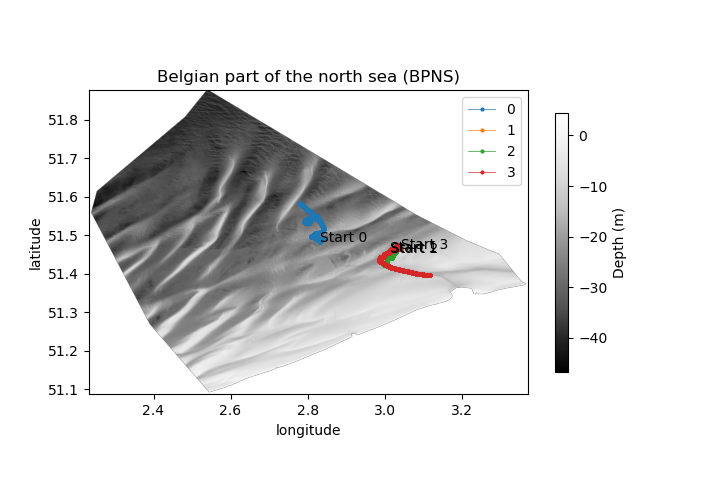

In [9]:
# plot navigation overview
ek80_per_station = theping.pingprocessing.split_pings.by_time_difference(all_pings_by_channel[base_key], 60)

fig, ax = theping.pingprocessing.overview.nav_plot.create_figure(
#fig, ax = create_figure(
    "Belgian part of the north sea (BPNS)", 
    aspect="equal", 
    background_image_path=os.path.join(folder,"BPNS_latlon.tiff"), 
    background_colorbar_label='Depth (m)',
    colorbar_orientation='vertical',
    add_grid=False,
    cmap="Greys_r"
)

stats = theping.pingprocessing.overview.get_ping_overview(ek80_per_station)

for k,v in stats.items():
    v.plot_navigation(ax, label=k)

print(f"plotting overview for pings: Done    ")
ax.legend()

fig.set_figwidth(3.34646) #85mm
fig.set_figwidth(7.08661) #180mm

In [13]:
from collections import defaultdict

pings_by_station_by_channel = defaultdict(dict)

for station,base_pings in tqdm(ek80_per_station.items()):
    for channel, pings in tqdm(all_pings_by_channel.items()):
        pings_by_station_by_channel[station][channel] = theping.pingprocessing.filter_pings.by_ping_times(pings, base_pings)


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [17]:
print("stations:", pings_by_station_by_channel.keys())
print("channels:", pings_by_station_by_channel[1].keys())

stations: dict_keys([0, 1, 2, 3])
channels: dict_keys(['WBT 400051-15 ES120-7C_ES', 'WBT 400038-15 ES18_ES', 'WBT 400052-15 ES200-7C_ES', 'WBT 400040-15 ES38-7_ES', 'WBT 400058-15 ES333-7C_ES', 'WBT 400050-15 ES70-7C_ES', 'TRX-2004', 'TRX-2031'])


In [18]:
station = 0
channels = [
    'TRX-2004', 
    'TRX-2031',
    #'WBT 400038-15 ES18_ES', 
    'WBT 400040-15 ES38-7_ES', 
    #'WBT 400050-15 ES70-7C_ES', 
    #'WBT 400051-15 ES120-7C_ES', 
    #'WBT 400052-15 ES200-7C_ES', 
    'WBT 400058-15 ES333-7C_ES', 
]

In [19]:
pings_by_channel = {}

for channel in channels:
    pings_by_channel[channel] = pings_by_station_by_channel[station][channel]

# create echograms from the data

In [ ]:
echogram_data = {}

for k,pings in tqdm(pings_by_channel.items()):
    
    echogram_data[k] = theping.pingprocessing.watercolumn.echograms.EchogramBuilder.from_pings(
        pings,
        pss=theping.echosounders.pingtools.PingSampleSelector(),
        wci_value = 'sv/av/pv/rv',
        linear_mean=True,
        no_navigation=False,
        apply_pss_to_bottom=False,
        force_angle=None,
        depth_stack=False,
        verbose=False)

  0%|          | 0/4 [00:00<?, ?it/s]

In [92]:
# set axis
for k,e in tqdm(echogram_data.items()):
    e.set_x_axis_date_time()
    e.set_y_axis_depth()

  0%|          | 0/4 [00:00<?, ?it/s]

# Display echogram using echogram viewer

In [93]:
pingviewer = theping.pingprocessing.widgets.WCIViewer(theping.pingprocessing.group_pings.dual_head(pings_mbes))

In [94]:
echogramviewer = theping.pingprocessing.widgets.EchogramViewer(echogram_data)
echogramviewer.connect_pingviewer(pingviewer)

line_builder = theping.pingprocessing.widgets.tools.InteractiveLineBuilder(echogramviewer)

# Read and process CSV file as layer

In [65]:
import pandas as pd
csv_data = pd.read_csv(os.path.join(folder,'csv/ST2227_SBE09_2.csv'))
csv_data['Datetime'] = pd.to_datetime(csv_data['Datetime'],utc=True, dayfirst=True)
csv_data = csv_data.set_index('Datetime')
csv_data['DepSM'] += 2
#csv_data

In [66]:
data_vals = csv_data.copy()
del data_vals['Vessel']
del data_vals['Plume']
del data_vals['Activity']
data_vals = data_vals[data_vals['DepSM'] > 0]
data_vals = data_vals.resample('1min').mean().dropna()

for e in echogramviewer.echogramdata:
    e.clear_layers()
    e.add_layer('ctd',data_vals.index, data_vals['DepSM']-1,data_vals['DepSM']+1)

#data_vals

In [69]:
from collections import defaultdict
import datetime
import pandas as pd

T= defaultdict(list)
V= defaultdict(list)
W= defaultdict(list)
data = defaultdict(pd.DataFrame)
for i,e in enumerate(tqdm(echogramviewer.echogramdata)):
    name = echogramviewer.names[i]
    try:
        for p in tqdm(list(e.iterate_ping_data(True))):
            e0,e1 = p.get_extent_layers()['ctd']
            l0,l1 = p.get_limits_layers()['ctd']
            if e0 == e1:
                continue
        
            T[name].append(datetime.datetime.fromtimestamp(p.get_ping_time(), tz=datetime.timezone.utc))
            wci = p.get_wci_layers_range_stack()['ctd']
            V[name].append(wci)
            W[name].append(np.mean(wci))
    except:
        pass

    data[name]['time'] = pd.to_datetime(T[name])
    data[name][f'mean sv - {name}'] = W[name]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/19615 [00:00<?, ?it/s]

  0%|          | 0/19615 [00:00<?, ?it/s]

In [77]:
len(merged_df[0])

0

/ssd/src/themachinethatgoesping/tutorials/.pixi/envs/default/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

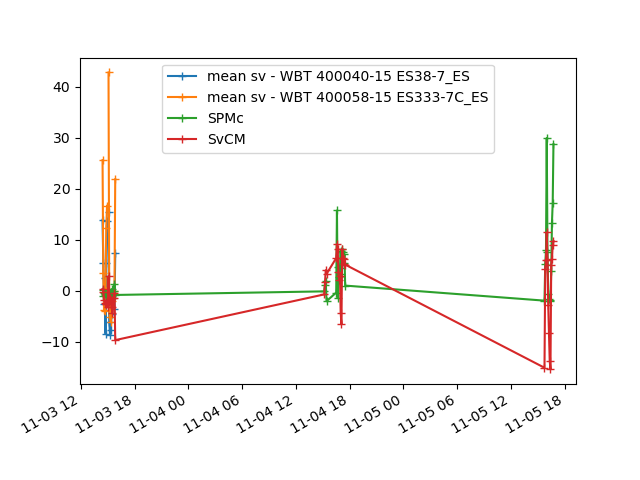

In [78]:
merged_df = []
for name,d in data.items():
    merged_df.append(data[name].set_index('time').resample('5min').mean())

data_vals = csv_data.copy()
data_vals = data_vals[data_vals['DepSM'] > 0]
data_vals = data_vals[['SPMc']]
data_vals['SvCM']=10*np.log10(data_vals['SPMc'])
data_vals = data_vals.resample('5min').mean().dropna()
merged_df.append(data_vals)

merged_df_ = merged_df
merged_df = []
for df in merged_df_:
    if len(df) >0:
        merged_df.append(df)

merged_df = pd.concat(merged_df,axis=1)

for k in merged_df.keys():
    merged_df[k]-=np.nanmedian(merged_df[k])


merged_df.plot(marker='+')

In [59]:
import xarray as xr
import pandas as pd

def image_to_xarray(
    image, 
    extent,
    name=None,
    xdim='x',
    ydim='y',
    **attrs
):
    xres = (extent[1]-extent[0])/(image.shape[0])
    yres = (extent[3]-extent[2])/(image.shape[1])

    x_coords = [extent[0]-xres/2 +xres*x for x in range(image.shape[0])]
    y_coords = [extent[2]-yres/2 +yres*y for y in range(image.shape[1])]
    
    if isinstance(x_coords[0],datetime.datetime):
        x_coords = pd.to_datetime(x_coords).tz_localize(None)
    
    # Convert to xarray DataArray
    da = xr.DataArray(
        image,
        name=name,
        dims=[xdim, ydim],
        coords={xdim: x_coords, ydim: list(reversed(y_coords))},
        attrs=attrs,
    )

    return da

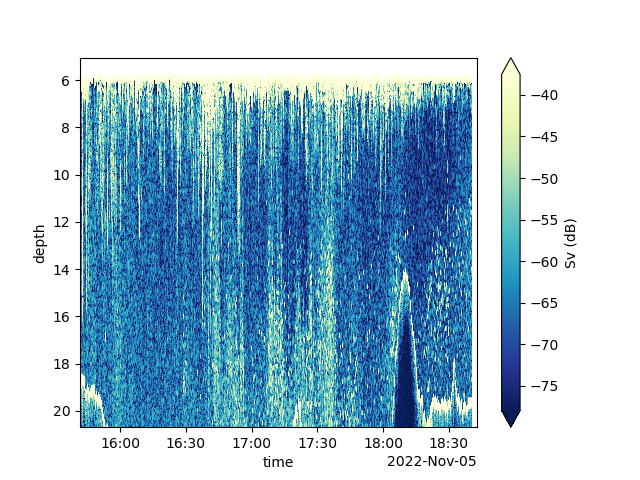

In [60]:
plt.figure()
im = image_to_xarray(
    echogramviewer.high_res_images[0],
    echogramviewer.high_res_extents[0],
    name = 'Sv (dB)',
    xdim = 'time',ydim='depth',
    #attr={
    #    'name':echogramviewer.names[0]
    #}
)

im.transpose().plot.imshow(yincrease=False,vmin=np.nanquantile(im,0.05),vmax=np.nanquantile(im,0.95), cmap='YlGnBu_r')


In [63]:
im.to_netcdf('test.nc', format='NETCDF4', engine="netcdf4")

In [64]:
pd = im.to_pandas()
pd

depth,5.051240,5.066520,5.081801,5.097081,5.112362,5.127642,5.142923,5.158203,5.173484,5.188764,...,20.545647,20.560928,20.576208,20.591489,20.606769,20.622050,20.637330,20.652611,20.667891,20.683172
time,,,,,,,,,,,,,,,,,,,,,
2022-11-05 15:41:41.098236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-66.663536,-63.902573,-64.135475,-61.327496,-64.617767,-57.101532,-54.681618,-62.393303,-64.077293,-61.358776
2022-11-05 15:41:43.750350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-57.195610,-64.323990,-68.460938,-82.710625,-65.086365,-62.285553,-64.134186,-73.068863,-73.718086,-68.353859
2022-11-05 15:41:46.402464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-63.606030,-64.643173,-63.018101,-59.187042,-59.302315,-67.966393,-79.269157,-70.576996,-68.745003,-71.706009
2022-11-05 15:41:49.054578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-59.774956,-62.253765,-63.549622,-71.190643,-68.982346,-68.250999,-68.354546,-62.630325,-69.965675,-74.013184
2022-11-05 15:41:51.706692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-65.008995,-68.640358,-65.456161,-60.091915,-61.035141,-60.398033,-60.000740,-59.739944,-63.794708,-65.361191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-05 18:42:30.896610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-05 18:42:33.548724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-05 18:42:36.200838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
pd.to_csv('test.csv')